In [2]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 10 # 글자크기

In [10]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 위에 데이터를 가지고 로지스틱회귀로 모델을 구현을 하시오.
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [12]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [13]:
train_input,test_input,train_target,test_target = train_test_split(
    data,target,random_state=42
)

In [14]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
# 데이터 실습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [16]:
# 데이터 예측률
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7859195402298851
0.7655384615384615


In [31]:
# 경사하강법 머신러닝 훈련
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',random_state=42)
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', random_state=42)

In [32]:
# 데이터 예측률
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7736042692939245
0.7513846153846154


In [33]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7635467980295566
0.7433846153846154


In [34]:
sc = SGDClassifier(loss='log_loss',random_state=42)

# 그래프
train_score = []
test_score = []

classes = np.unique(train_target)

In [35]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1 = sc.score(train_scaled,train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled,test_target)
    test_score.append(sc2)

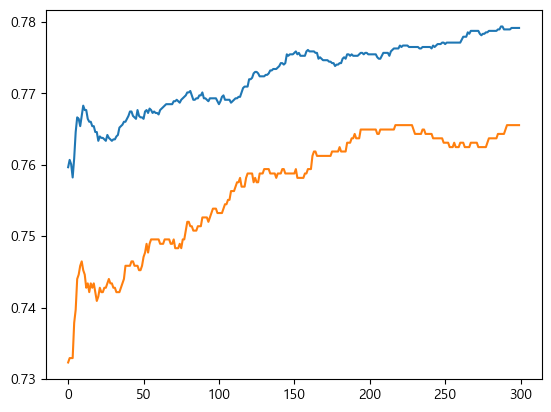

In [36]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [37]:
# 피쳐 너무 적고, 정답률 높지 않아서.. 다른 모델을 대입해서 사용

In [39]:
# 결정트리 모델
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

# 순수노드 나올때까지 훈련
# 과대적합: 85% 대면 높은 정답률을 가짐.

0.9973316912972086
0.8516923076923076


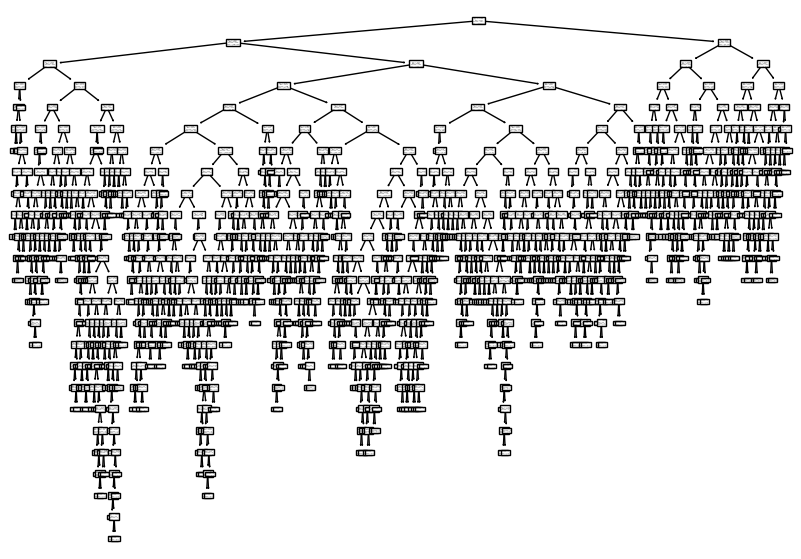

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

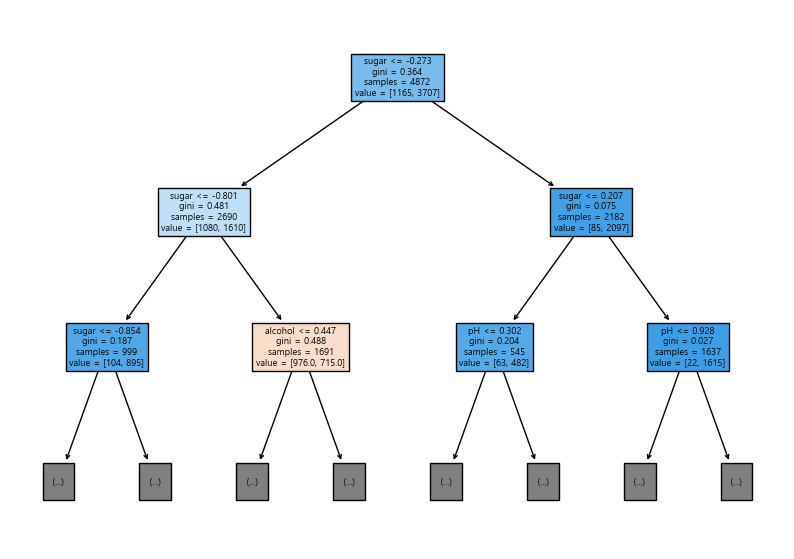

In [44]:
plt.figure(figsize=(10,7))
# 노드
# max_depth: 가지의 깊이 조정
# filled: 색상 조정
# 찐한 파란색: 양성 클래스,1 / 주황색: 음성 클래스,0
plot_tree(dt, max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [49]:
# 가지치기를 해서 과대 적합 문제를 해결
# 3,4,5,6...10 가장 효율이 좋은 모델을 적용
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(train_scaled,train_target)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8725369458128078
0.8584615384615385


In [51]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

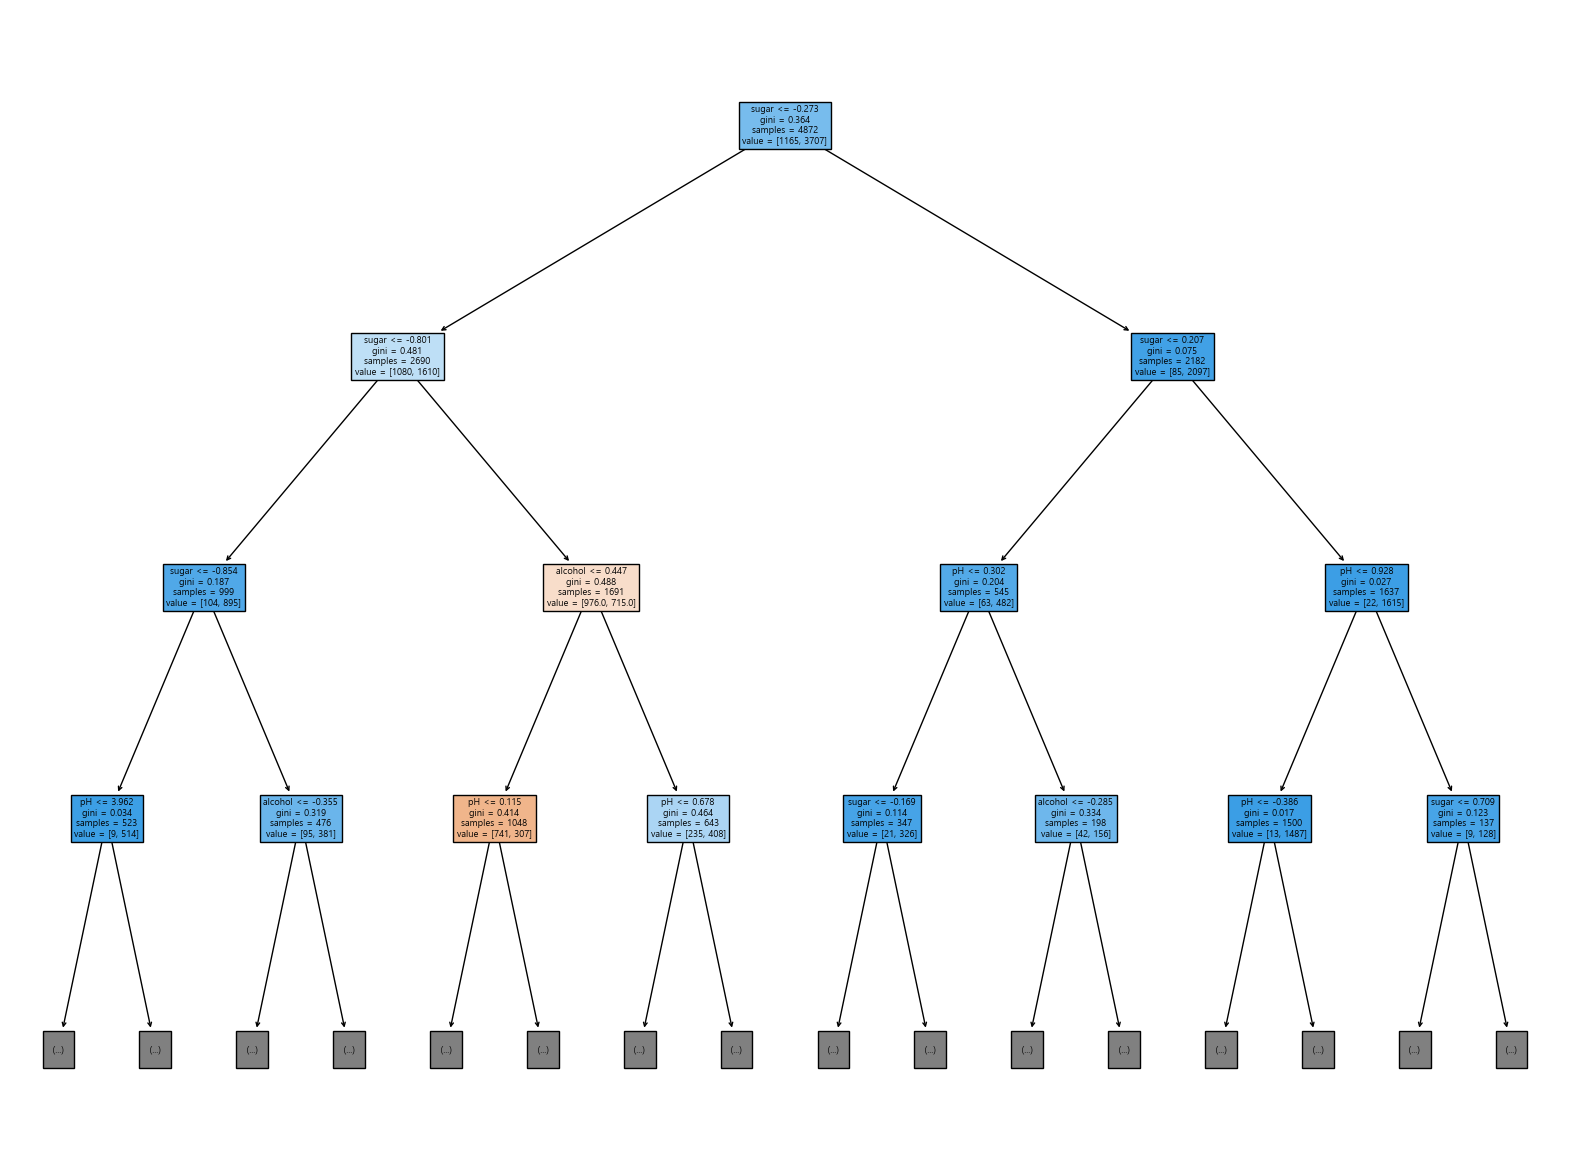

In [54]:
plt.figure(figsize=(20,15))
plot_tree(dt,max_depth=3,filled=True,feature_names=wine.columns)
plt.show()

In [55]:
# min_impurity_decrease: 최소 불순도 조정해서 속도개선, 효율도 올릴 수 있도록 모델을 조정
# 부모의 불순도 - 자식의 불순도 크기 큰 쪽을 선택, 차이가 0.005도 안나면 그 노드에서 결정
# 과대적합 해결 - max_depth, min_impurity_decrease
dt = DecisionTreeClassifier(min_impurity_decrease=0.005,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8626847290640394
0.8492307692307692
